In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip #download archive files

--2021-12-12 12:19:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.05MB/s    in 0.3s    

2021-12-12 12:19:52 (1.05 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [ ]:
!unzip Bike-Sharing-Dataset.zip #unpack archive files 

Archive:  Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [ ]:
 !cat Readme.txt #information about data

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#We will be use only hour.csv  data set
data = pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# I. Data Preprocessing

In [ ]:
data.drop('instant', axis = 1, inplace = True) #This column corresponds to the observation number and does not make sense 

In [ ]:
#Let's look at the data content regarding non-null values

data.info() #there are no null values in this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [ ]:
data.describe() 

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The minimum value of rental bikes equals 1. It can be assumed that the information about rent was not recorded if bicycles were not rented. 

We can make some diagrams to visualize our data:

- Historgrams to describe distribution of each feature
- Heatmap matrix to estimate the correlation between each pair of columns 

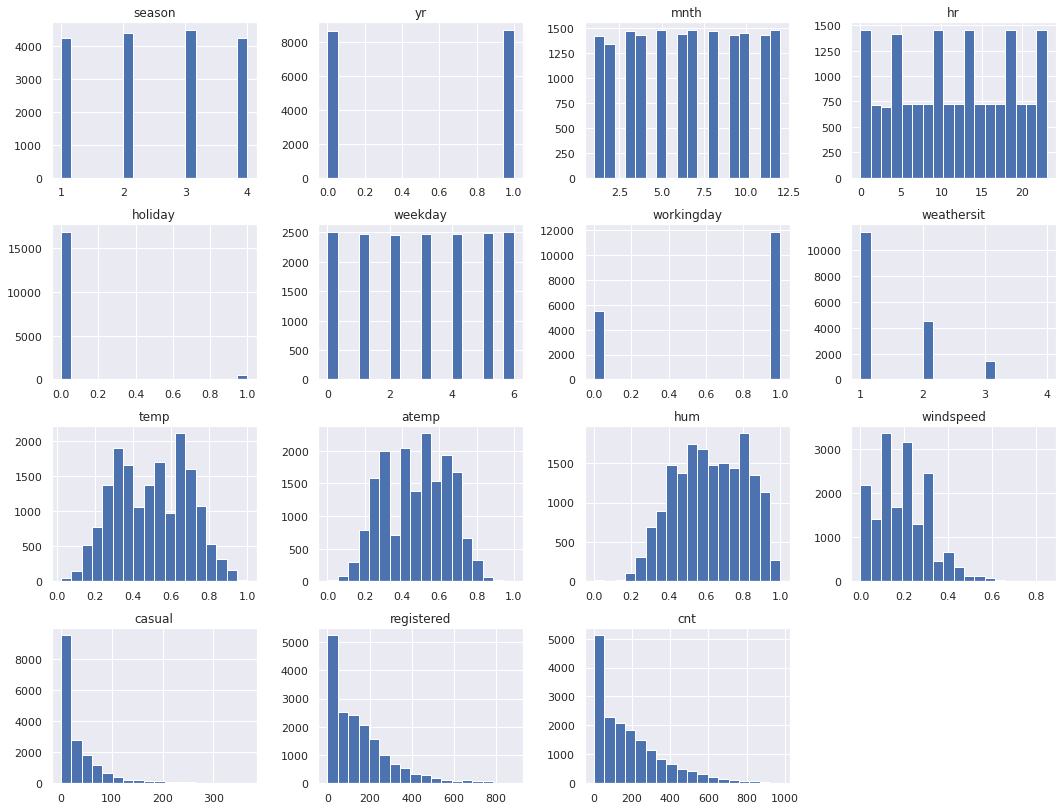

In [ ]:
sns.set(rc = {'figure.figsize':(18,14)})
data.hist(bins = 18);

Looking at these histograms we can note some points:

- features 'season', 'mnth', 'yr', 'weekday' have discrete uniform distribution, which means that our data is balanced "in time". Data contains almost the same number of records for different seasons, years, weekdays.

- the distribution of feature 'hr' doesn't look uniform, wich may be connected with the assumption made earlier: if no bikes are rented at this hour, information is not being recorded.

- Information about workingday looks little bit strange, because working days in usual sense are 5 days out of seven, but the ratio of the bars heights is more like a 1: 2 ratio. Holidays are also considered non-working days, but we can see on the histogram "Holidays" that there are few such days. 

- distributions of features 'temp', 'atemp' and 'hum' (humidity) are similar to normal; polymodality  may be seen in 'temp' and 'atemp' features distributions; positive skewness may be seen in 'windspeed' feature distribution.

- target feauture 'cnt' seems to have exponential distribution (as well as 'casual' and 'registered') or may be Poisson distribution with $\lambda = 1$

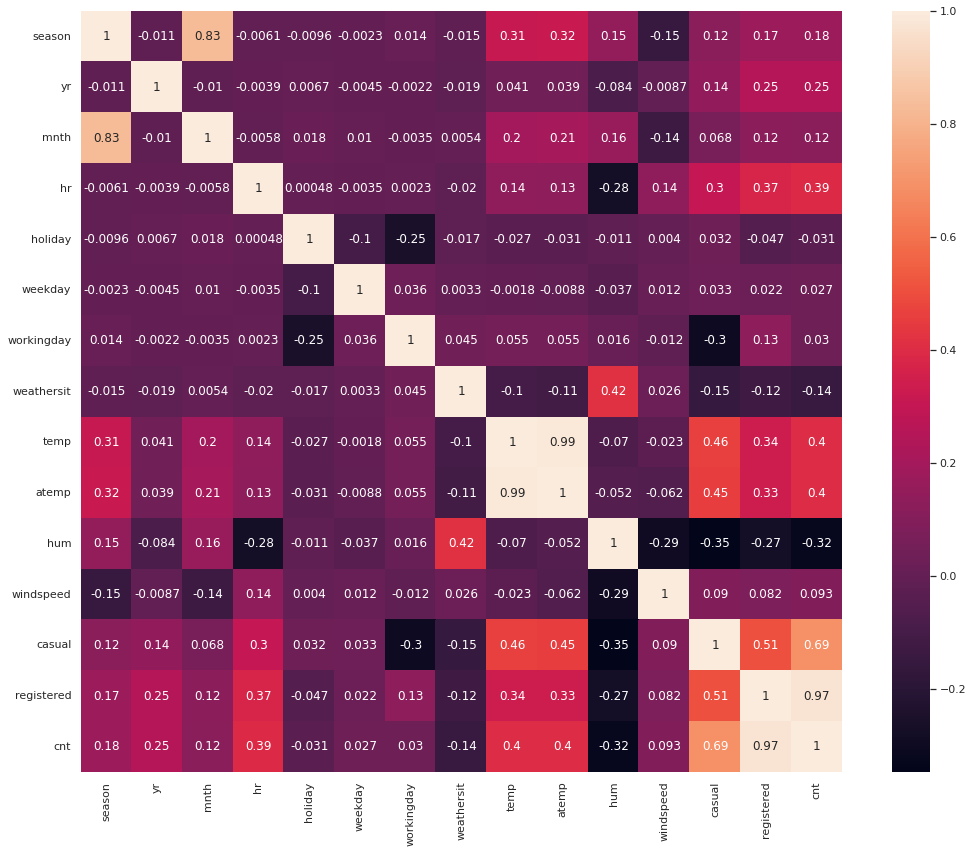

In [ ]:
sns.set(rc = {'figure.figsize':(18,14)})
sns.heatmap(data.corr(), annot = True, square = True)

- As we can see features 'temp' and 'atemp are highly correlated. This is quite expected, because 'temp' - normalized temperature in Celsius, while 'atemp' - normalized feeling temperature in Celsius.

- The high correlation between 'season' and 'month' is also quite obvious. Information about both feautures can be redundant.

- 'cnt' is the sum of 'casual' and 'registered', thus this feature is correlated with both of them; but it is more correlated with 'registered'. The reason may be that there are more registered users than casual users, and they contribute the most to the total amount and determine its behavior. Further we will dwell a little on this issue. 

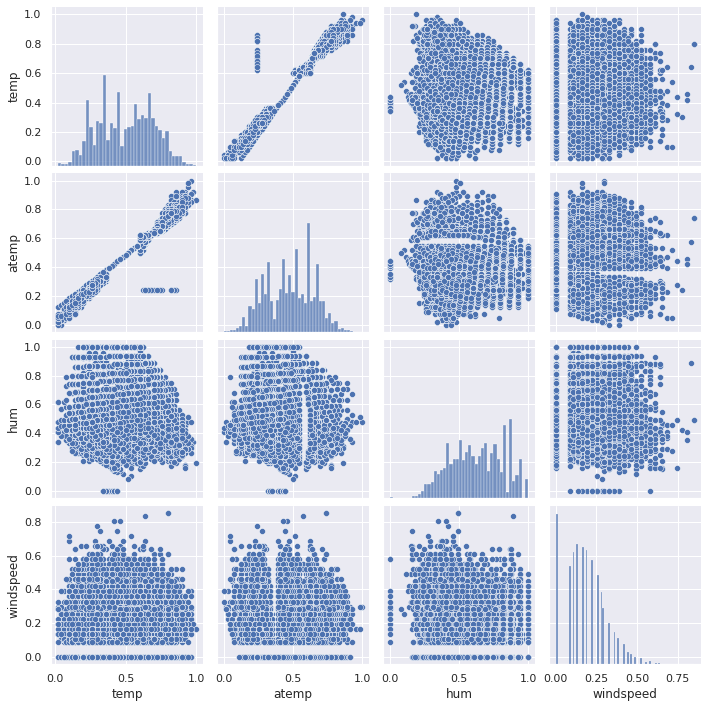

In [ ]:
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed']]);

As we can see, there is dependence between 'temp' and 'atemp' features, so we can drop one of them. Also we can see the strange peak at 'zero' for 'windspeed' feature, so we can try to drop these observations from sample. But there are many observations with 0 value for this feature and they do not look like outliers, they probably reflect completely calm weather without wind.

In [ ]:
data.drop('atemp', axis = 1, inplace = True)

Let's depict how the average monthly number of rental bikes changes during the year. Let's draw curves for both 2011 and 2012 years. 

In [ ]:
data_month = data.groupby(['yr', 'mnth']).mean('cnt')
data_month = data_month.rename(columns = {'cnt' : 'total'})
data_month.head()

season         hr   holiday  ...     casual  registered       total
yr mnth                                 ...                                   
0  1     1.000000  11.872093  0.034884  ...   4.466570   51.040698   55.507267
   2     1.000000  11.785824  0.036980  ...   9.617874   64.673344   74.291217
   3     1.356164  11.652055  0.000000  ...  17.569863   70.163014   87.732877
   4     2.000000  11.511822  0.033380  ...  31.079277  100.867872  131.947149
   5     2.000000  11.500000  0.032258  ...  41.733871  140.821237  182.555108

[5 rows x 12 columns]

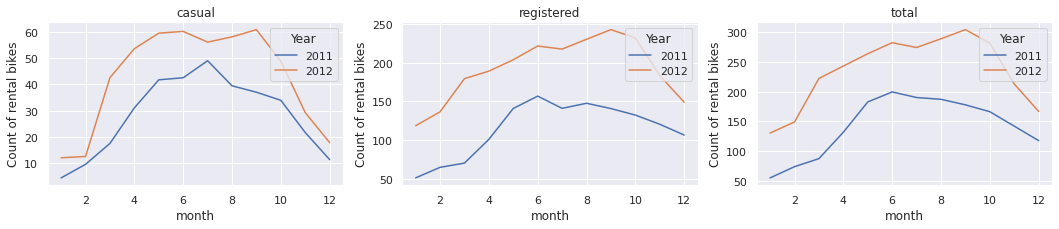

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))
cols = ['casual', 'registered', 'total']
for idx, col in  enumerate(cols):
  sns.lineplot(data = data_month.loc[0][col], ax = axes[idx], label = '2011')
  sns.lineplot(data = data_month.loc[1][col], ax = axes[idx], label = '2012')
  axes[idx].set_xlabel('month')
  axes[idx].set_ylabel('Count of rental bikes')
  axes[idx].set_title(col)
  axes[idx].legend(title = 'Year', loc = 1)

As we can see, for each month, the average monthly number of rented bikes in 2012 is more than in 2011 . It may be connected with the growing popularity of bikes, with the improvement in work of the rental system, and so on. It can be concluded that the feature is important, because there is a difference between two years. Column 'yr' should not be removed from the feature matrix. 

However, it should be noted that for a real problem there are some nuances: in some of the years the number of users may reach a plateau and stop growing from year to year or, on the contrary, the use of bike rental may fall for some reason (lockdown due to coronavirus infection, for example). But in our case study we use data only about these two years and we will not go into such nuances.

Total count of rental bikes includes casual users and registered users. So column 'cnt' is the sum of 'casual' and 'rigestered' columns. So we can predict both 'casual' and 'rigestered' separately and then calculate total count of rental bikes. But to simplify the task, since it is educational, we will predict immediately total count of rental bikes.

In [ ]:
data.drop(['casual', 'registered'], axis = 1, inplace = True)

Let's add information about what day of the month the record was made for. 

In [ ]:
data['day'] =  pd.to_datetime(data['dteday']).dt.day
data.drop('dteday', axis = 1, inplace = True)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,1


We transform the feature "day" into a feature that has three ranks: rank 1 - the first 10 days of the month, rank 2 - from the 11th to the 20th day of the month, rank 3 - on the 21st day of the month and later. 

In [ ]:
rancs = {i + 1 : (i + 10)//10 for i in range(max(data.day) -1)}
rancs[max(data.day)] = 3
fun = lambda i : rancs[i]
vect = np.vectorize(fun)
data['day_ranc'] = vect(data.day)

We have a lot of categorical features, that we must encode them into dummy variables. It was decided to drop 'weekday' feature, because 'workingday' feature can be enough. Also, in my opinion, information about month is enough, so column 'season' may be dropped, too (these features are high correlated)

In [ ]:
data = data.join(pd.get_dummies(data.mnth, 'mnth'))
data = data.join(pd.get_dummies(data.weathersit	, 'weathersit'))
data = data.join(pd.get_dummies(data.day_ranc, 'ranc'))
data = data.join(pd.get_dummies(data.hr, 'hour'))

Now we need to remove redundant variables. If we know, that there are zeroes in the columns mnth2, mnth3, ..., mnth12, it means that there is 1 in mnth 1 column. So $n - 1$ features fully encode the $n$ possible variants of the original categorical feature.

In [ ]:
data_processed = data.drop(columns = ['mnth', 'mnth_1', 'season', 'day',  'ranc_1', 'weathersit_1', 'weathersit', 'day_ranc', 'hour_0', 'hr', 'weekday'])

In [ ]:
data_processed.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'ranc_2', 'ranc_3', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

We shoul make sure that there are no strongly correlated features in our data.

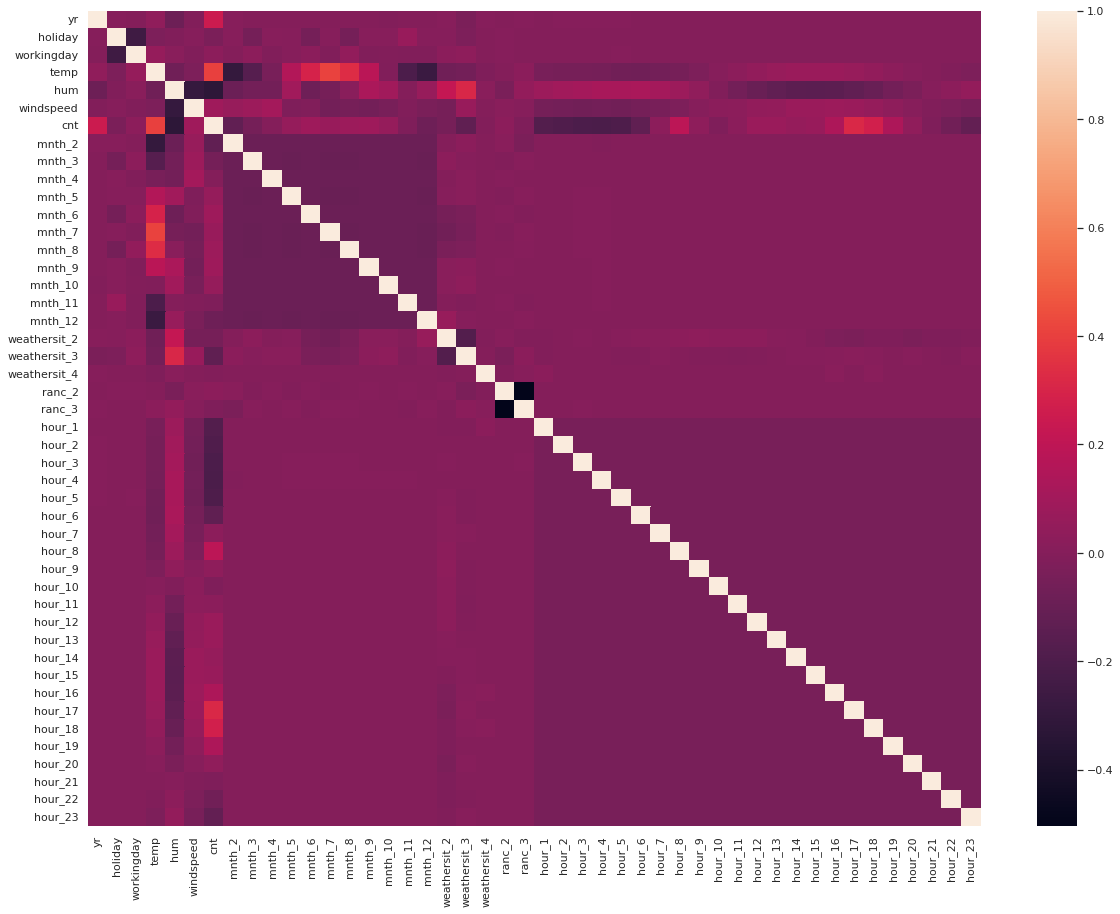

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(data_processed.corr())

I tried to apply the PCA to the data, but this did not give any result: 95% of the variability was explained by 36 components and linear models showed the worse results.

# II. Building regression models and tuning their parameters

We should split our dataset into train ans test samples before creating and tuning different models. 

In [ ]:
Y = data_processed[['cnt']]
X = data_processed.drop('cnt', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 99) #random_state was set for reproducibility of results 

Our data are presented either by already pre-normalized features (temperature, humidity, wind speed), or by categorical encoded features.

As far as I know, scaling is almost always recommended, since it is never superfluous. 

In [ ]:
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

X_test_array = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

For each model metrics of performance $R^2$ and $RMSE$ will be estimated. Also the scatter plot 'Predicted vs Observed' for target feauture will be created. We can make function to avoid code duplicating.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def model_perfomance(model, x_test, y_test, sample):
  y_pred = np.ravel(model.predict(x_test))
  y_test = np.ravel(y_test)
  R2 = r2_score(y_test, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
  print(f'R2-score for {sample} : {R2}')
  print(f'RMSE for {sample} : {RMSE}')
  plt.figure(figsize=(6,6))
  plt.scatter(y_test, y_pred)
  plt.gca().set(xlabel='observed',
              ylabel='predicted', title='Count of rental bikes')
  return [R2, RMSE]

## 1) Linear regression

Loss-function:
$L(f, X, y) = \sum_{i=1}^{N}(y_i - \langle x_i, w \rangle)^2$

In [ ]:
from sklearn.linear_model import LinearRegression 

R2-score for train : 0.6846813036685602
RMSE for train : 102.06141362675486


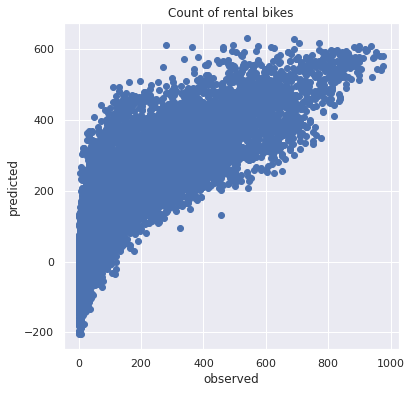

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train) #model fitting


R2_train, RMSE_train = model_perfomance(linear_reg, X_train, Y_train, 'train')

We may notice that some values ​​of the target variable take negative values, which is contrary to common sense. We can "refine" the data predicted by the model by assigning a value of 0 to the target variable if the model predicts it as negative. In addition, the models predict real values, while the value belongs to the set of natural numbers. We could transform the function in the following way so that the model produces adequate results for the customer, but I cannot be sure that this is what we do in practice. This is an additional research question. 

In [ ]:
def model_perfomance(model, x_test, y_test, sample):
  y_pred = np.ravel(model.predict(x_test))
  for i, y in enumerate(y_pred):
    y_pred[i] = int(y)
    if y < 0:
      y_pred[i]  = 0
  y_test = np.ravel(y_test)
  R2 = r2_score(y_test, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
  print(f'R2-score for {sample} : {R2}')
  print(f'RMSE for {sample} : {RMSE}')
  plt.figure(figsize=(6,6))
  plt.scatter(y_test, y_pred)
  plt.gca().set(xlabel='observed',
              ylabel='predicted', title='Count of rental bikes')
  return [R2, RMSE]

R2-score for train : 0.7023974519721736
RMSE for train : 99.1528132285863


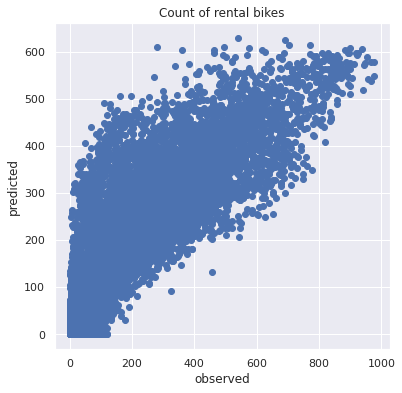

In [ ]:

R2_train, RMSE_train =  model_perfomance(linear_reg, X_train, Y_train, 'train')

R2-score for test : 0.6891140827565831
RMSE for test : 100.2452989694657


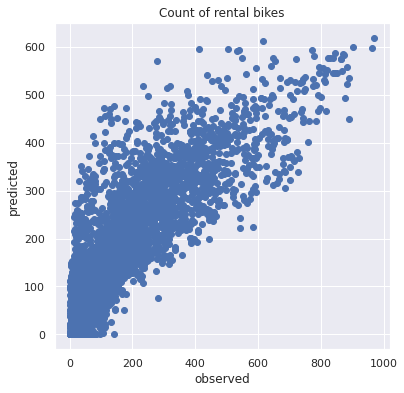

In [ ]:
R2_test, RMSE_test = model_perfomance(linear_reg, X_test, Y_test, 'test')

Let's create a dataframe where we will store the value of the coefficient of determination and RMSE value for each algorithm before and after tuning of hyperparameters. We will also store a table with metrics and parameters of the best model for each of the algorithms.There are no parametres to tune in this model, because it is classic linear regression model.

In [ ]:
perfomance = pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [str()],
                       'RMSE_train (after tuning)' : [str()],
                       'R2_test (after tuning)' : [str()],
                       'RMSE_test (after tuning)' : [str()]}, index = ['Linear regression'])


best_results = pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                        'Best parameters' : ['-']}, index = ['Linear regression'])

In [ ]:
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-


This is not reflected in the laptop, however, various combinations of features were tried and the result higher than that obtained was not achieved. This may be due to the fact that the features are mostly categorical, and the features that look real (temperature, wind speed, humidity) were originally integer, just pre-normalized by the authors of the dataset. 

## 2) Ridge regression

In this case the loss function is the linear least squares function and regularization is given by the $L_2$-norm. 

Loss-function:
$L(f, X, y) = \sum_{i=1}^{N}(y_i - \langle x_i, w \rangle)^2 + \alpha_{II}\sum_{j=1} w_j^{2}$

$L_2$ regularization helps to solve the problem of multicollinearity by reducing weights for linearly dependent features. 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

- Without tuning

R2-score for train : 0.7023848432346003
RMSE for train : 99.15491364501132


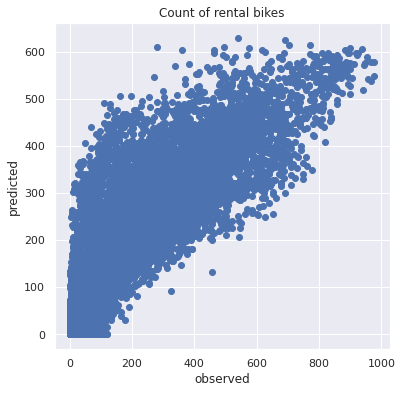

In [ ]:
#training the model and checking its effectiveness with default parameters 

ridge = Ridge(max_iter = 2000)

ridge.fit(X_train, Y_train)
R2_train, RMSE_train = model_perfomance(ridge, X_train, Y_train, 'train')

R2-score for test : 0.6891275663573069
RMSE for test : 100.24312504944064


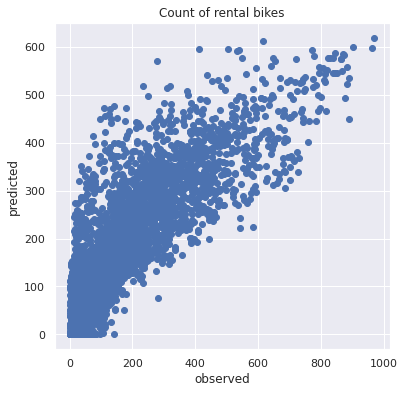

In [ ]:
R2_test, RMSE_test = model_perfomance(ridge, X_test, Y_test, 'test')

- $L_2$ regularization parameter tuning:

In [ ]:
#alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
alphas = np.logspace(-6, 1, num = 100)
ridge = Ridge(max_iter = 2000)
grid = GridSearchCV(estimator = ridge,
                    scoring = 'r2',
                    param_grid = dict(alpha = alphas),
                    cv=5)


grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'alpha': 1.0235310218990248}
Best cross validaton score 0.6823436386615556


The dependence of the coefficient of determination averaged over folds on the hyperparameter:

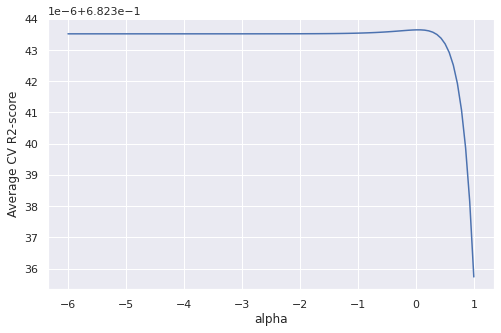

In [ ]:
sns.set(rc = {'figure.figsize':(8,5)})
plt.plot(np.log10(alphas), grid.cv_results_['mean_test_score'])
plt.xlabel('alpha')
_  = plt.ylabel('Average CV R2-score')

R2-score for train : 0.70238231321335
RMSE for train : 99.15533510121028


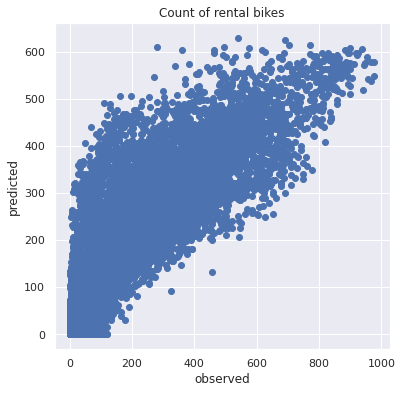

In [ ]:
# fitting the model with best parameters found

ridge = Ridge(alpha = grid.best_params_['alpha'], 
              max_iter = 2000)

ridge.fit(X_train, Y_train)

R2_train_t, RMSE_train_t = model_perfomance(ridge, X_train, Y_train, 'train')

R2-score for test : 0.6891243356331731
RMSE for test : 100.24364593358293


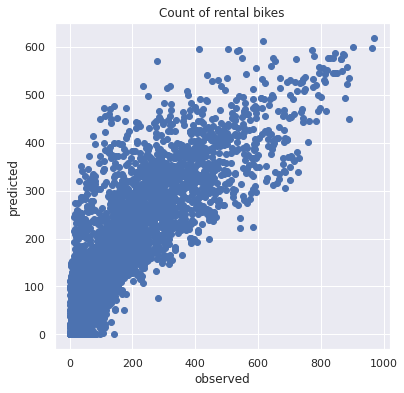

In [ ]:
#check this model on test with the best parameters found

R2_test_t, RMSE_test_t = model_perfomance(ridge, X_test, Y_test, 'test')

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['Ridge regression']))

In [ ]:
perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                        'Best parameters' : ['alpha_I = ' + str(round(grid.best_params_['alpha'],3))]}, 
                        index = ['Ridge regression']))

In [ ]:
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024


## 3) Lasso 

In this case the loss function is the linear least squares function and regularization is given by the $L_1$-norm. 

Loss-function:
$L(f, X, y) = \sum_{i=1}^{N}(y_i - \langle x_i, w \rangle)^2 + \alpha_{I}\sum_{j=1} |w_j|$

In [ ]:
from sklearn.linear_model import Lasso

- Without tuning

R2-score for train : 0.6930259048933528
RMSE for train : 100.7018808428811


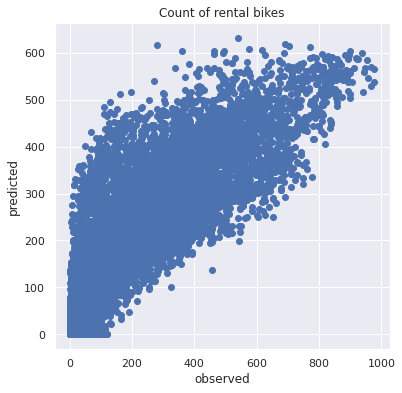

In [ ]:
lasso = Lasso(max_iter = 2000)
lasso.fit(X_train, Y_train)
R2_train, RMSE_train = model_perfomance(lasso, X_train, Y_train, 'train')

R2-score for test : 0.6807947367103828
RMSE for test : 101.57773217190652


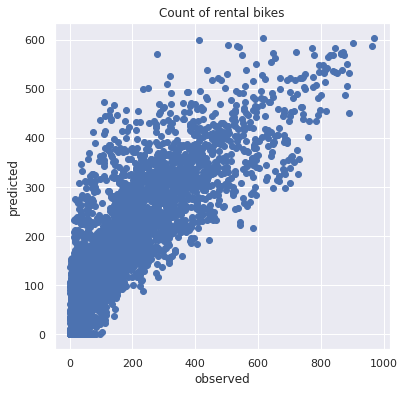

In [ ]:
R2_test, RMSE_test = model_perfomance(lasso, X_test, Y_test, 'test')

- $L_1$ regularization parameter tuning:

In [ ]:
alphas = np.logspace(-6, 1, 100)

lasso = Lasso(max_iter = 2000)
grid = GridSearchCV(estimator = lasso,
                    param_grid = dict(alpha = alphas),
                    cv = 5)

grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'alpha': 0.005590810182512223}
Best cross validaton score 0.682343888774488


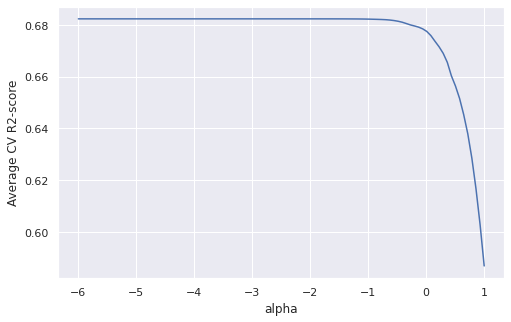

In [ ]:
plt.plot(np.log10(alphas), grid.cv_results_['mean_test_score'])
plt.xlabel('alpha')
_  = plt.ylabel('Average CV R2-score')

R2-score for train : 0.7023451510767754
RMSE for train : 99.16152544077876


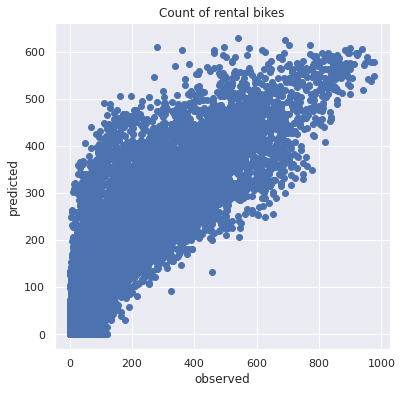

In [ ]:
# fitting the model with best parameters found

lasso = Lasso(alpha = grid.best_params_['alpha'],
              max_iter = 2000)

lasso.fit(X_train, Y_train)

R2_train_t, RMSE_train_t = model_perfomance(lasso, X_train, Y_train, 'train')

R2-score for test : 0.6890983207388397
RMSE for test : 100.24784017198797


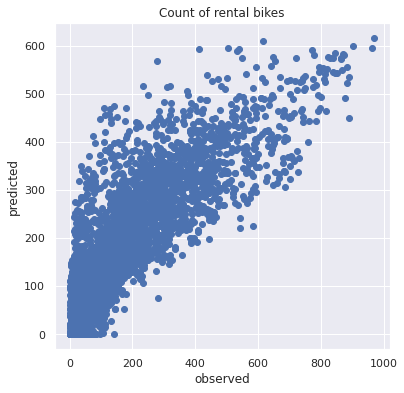

In [ ]:
#check this model on Test 

R2_test_t, RMSE_test_t = model_perfomance(lasso, X_test, Y_test, 'test')

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['Lasso']))

perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['alpha_II = ' + str(round(grid.best_params_['alpha'],3))]}, 
                        index = ['Lasso']))
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006


# 4) Elastic Net

In this case the loss function is the linear least squares function and regularization is given by both the $L_2$-norm and  the $L_1$-norm.

Loss-function:
$L(f, X, y) = \sum_{i=1}^{N}(y_i - \langle x_i, w \rangle)^2 + \alpha_{I}\sum_{j=1} |w_j| + \alpha_{II}\sum_{j=1} w_j ^2$

In [ ]:
from sklearn.linear_model import ElasticNet

- Without tuning

R2-score for train : 0.6034911722924832
RMSE for train : 114.44930204670189


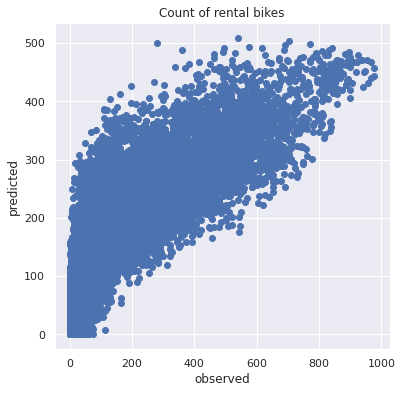

In [ ]:
elastic = ElasticNet( max_iter = 2000)

elastic.fit(X_train, Y_train)
R2_train, RMSE_train = model_perfomance(elastic, X_train, Y_train, 'train')

R2-score for test : 0.5975970398167321
RMSE for test : 114.04968079437155


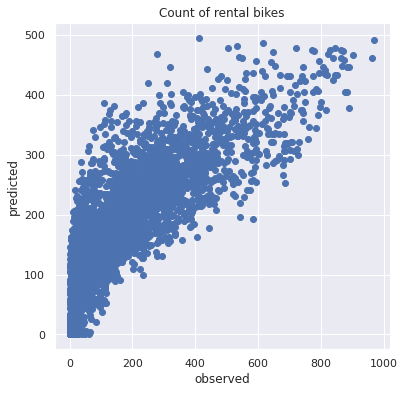

In [ ]:
R2_test, RMSE_test = model_perfomance(elastic, X_test, Y_test, 'test')

- Tuning parameters. Elastic Net in sklearn minimizes the objective function:

$\frac{1}{2 \cdot N} \cdot \sum_{i=1}^{N}(y_i - \langle x_i, w \rangle)^2 + \alpha \cdot L1ratio \cdot \sum_{j=1} |w_j| + 0.5 \cdot \alpha \cdot (1 - {L1ratio})\cdot\sum_{j=1} w_j ^2$

And tuning parameters are $\alpha$ and $L1$_$ratio$.

In [ ]:
params_grid = [
  {"alpha": [1e-2, 1e-1, 1, 10, 100],
   "l1_ratio": np.arange(0.01, 1.0, 0.01)},
 ]

In [ ]:
elastic = ElasticNet( max_iter = 2000)
grid = GridSearchCV(estimator = elastic,
                    scoring = 'r2',
                    param_grid = params_grid,
                    cv = 5)

grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'alpha': 0.01, 'l1_ratio': 0.99}
Best cross validaton score 0.6823430479014566


R2-score for train : 0.702309645864617
RMSE for train : 99.1674394146753


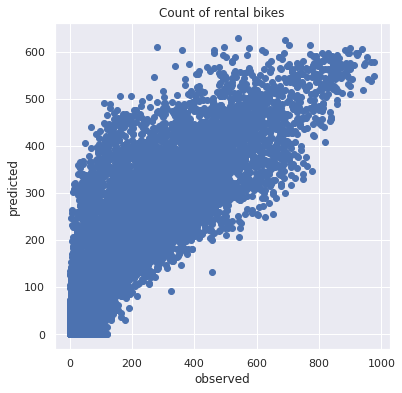

In [ ]:
#model fitting with best parameters
elastic = ElasticNet(alpha = grid.best_params_['alpha'], 
                  l1_ratio = grid.best_params_['l1_ratio'], max_iter = 2000)

elastic.fit(X_train, Y_train)

R2_train_t, RMSE_train_t = model_perfomance(elastic, X_train, Y_train, 'train')

R2-score for test : 0.689064562786665
RMSE for test : 100.25328251945845


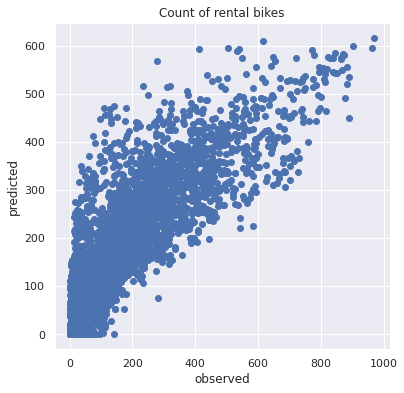

In [ ]:
#check this model on Test 

R2_test_t, RMSE_test_t = model_perfomance(elastic, X_test, Y_test, 'test')

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['ElasticNet']))
perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248
ElasticNet,0.603,114.449,0.598,114.050,0.702,99.167,0.689,100.253


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['alpha = ' + str(round(grid.best_params_['alpha'],3)) + ', '+
                'l1_ratio = ' + str(round(grid.best_params_['l1_ratio'],3))]}, 
                        index = ['ElasticNet']))

In [ ]:
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006
ElasticNet,0.702,99.167,0.689,100.253,"alpha = 0.01, l1_ratio = 0.99"


## 5) SVM

In [ ]:
X_train.shape

(13903, 45)

**From documentation:**

Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.

**In this regard, it is strictly not recommended to re-run cells with training the model and especially with its tuning.**

In [ ]:
from sklearn.svm import SVR

- Without tuning

R2-score for train : 0.46527836053983496
RMSE for train : 132.90783941634604


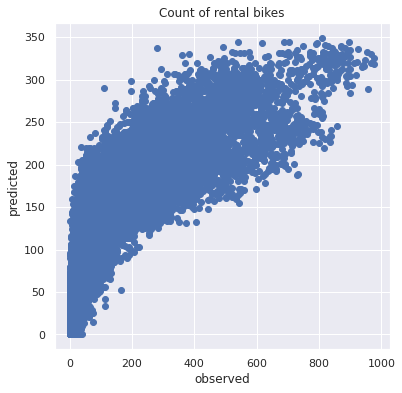

In [ ]:
svr = SVR()
svr.fit(X_train, np.ravel(Y_train))

R2_train, RMSE_train = model_perfomance(svr, X_train, Y_train, 'train')

R2-score for test : 0.4739857608302932
RMSE for test : 130.39539101401746


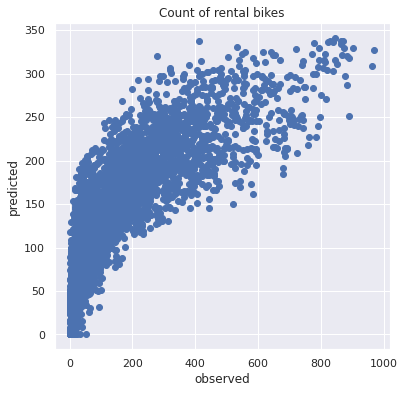

In [ ]:
R2_test, RMSE_test = model_perfomance(svr, X_test, Y_test, 'test')

- Parameters tuning

**C** is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

**kernel** specifies the kernel type to be used in the algorithm.

In [ ]:
params_grid = [
  {"kernel": ['poly', 'rbf', 'sigmoid'],
   'C': [1, 10, 100, 1000]},
 ]

In [ ]:
svr = SVR()
grid = GridSearchCV(estimator = svr,
                    param_grid = params_grid,
                    cv = 5)

grid.fit(X_train, np.ravel(Y_train))

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'C': 1000, 'kernel': 'rbf'}
Best cross validaton score 0.9244912445605717


In [ ]:
#model fitting with best parameters
svr = SVR(kernel = grid.best_params_['kernel'], 
           C = grid.best_params_['C'])

svr.fit(X_train, np.ravel(Y_train))

SVR(C=1000)

R2-score for train : 0.9666252878187059
RMSE for train : 33.2043882055002


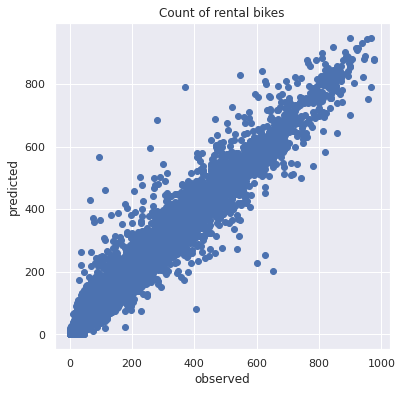

In [ ]:
R2_train_t, RMSE_train_t = model_perfomance(svr, X_train, Y_train, 'train')

R2-score for test : 0.9308838636967671
RMSE for test : 47.2664751995594


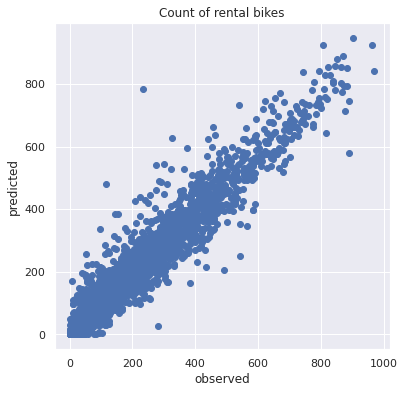

In [ ]:
R2_test_t, RMSE_test_t = model_perfomance(svr, X_test, Y_test, 'test')

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['SVM']))
perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248
ElasticNet,0.603,114.449,0.598,114.050,0.702,99.167,0.689,100.253
SVM,0.465,132.908,0.474,130.395,0.967,33.204,0.931,47.266


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['C = ' + str(grid.best_params_['C']) + ', ' + 'kernel = ' + grid.best_params_['kernel']]}, 
                        index = ['SVM']))

In [ ]:
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006
ElasticNet,0.702,99.167,0.689,100.253,"alpha = 0.01, l1_ratio = 0.99"
SVM,0.967,33.204,0.931,47.266,"C = 1000, kernel = rbf"


## 6) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

- Without tuning

R2-score for train : 0.9871128817062834
RMSE for train : 20.633106777777602


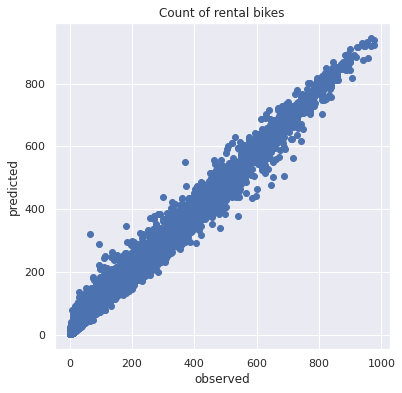

In [ ]:
rfr1 = RandomForestRegressor()

rfr1.fit(X_train, np.ravel(Y_train))
R2_train, RMSE_train = model_perfomance(rfr1, X_train, Y_train, 'train')

R2-score for test : 0.9103177057658728
RMSE for test : 53.84146217815935


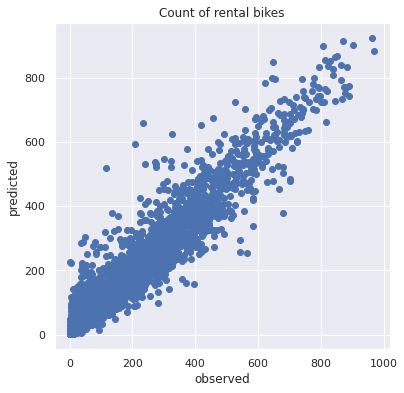

In [ ]:
R2_test, RMSE_test = model_perfomance(rfr1, X_test, Y_test, 'test')

- Parameters tuning

Parameters: 
1. number of trees in the forest
2. number of predictors randomly chosen at each split

In [ ]:
params_grid = [
  {"n_estimators": np.arange(10, 105, 5),
   "max_features": np.arange(6, 48, 3)},
 ]

In [ ]:
rfr = RandomForestRegressor()

grid_rf = GridSearchCV(estimator = rfr,
                    param_grid = params_grid,
                    cv = 5)

grid_rf.fit(X_train, np.ravel(Y_train))

print("Best params:", grid_rf.best_params_)
print("Best cross validaton score", grid_rf.best_score_)

Best params: {'max_features': 33, 'n_estimators': 100}
Best cross validaton score 0.9004165738676448


In [ ]:
rfr = RandomForestRegressor(n_estimators = grid_rf.best_params_['n_estimators'],
                              max_features = grid_rf.best_params_['max_features'])

rfr.fit(X_train,  np.ravel(Y_train))

RandomForestRegressor(max_features=33)

R2-score for train : 0.9869940164307962
RMSE for train : 20.728043848115583


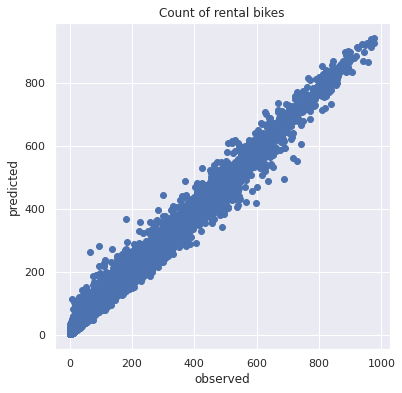

In [ ]:

R2_train_t, RMSE_train_t = model_perfomance(rfr, X_train, Y_train, 'train')

R2-score for test : 0.9093800570615598
RMSE for test : 54.12219265356365


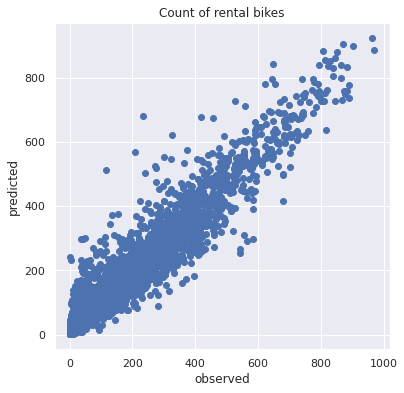

In [ ]:
R2_test_t, RMSE_test_t = model_perfomance(rfr, X_test, Y_test, 'test')

You can see that the metrics after using the grid search have become a little worse. I tried to run the grid search with slightly different parameters and in one of the cases I got the following best parameters:

- n_estimators = 95
- max_features = 42

Unfortunately, I cannot reproduce this result again as the grid search takes a very long time. However, let's try to train the model with the parameters that I received in the first run.

In [ ]:
rfr2 = RandomForestRegressor(n_estimators = 95,
                              max_features = 42)

rfr2.fit(X_train,  np.ravel(Y_train))

RandomForestRegressor(max_features=42, n_estimators=95)

R2-score for train : 0.9870279082645154
RMSE for train : 20.701018991772013


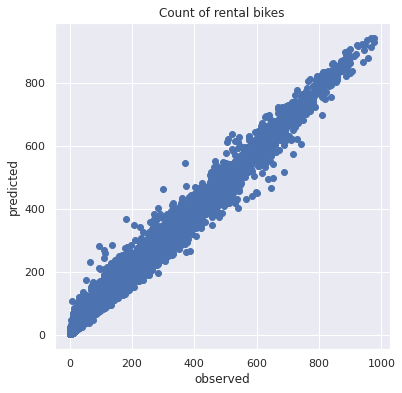

In [ ]:
R2_train_t, RMSE_train_t = model_perfomance(rfr2, X_train, Y_train, 'train')

R2-score for test : 0.9108437886957557
RMSE for test : 53.683310917977344


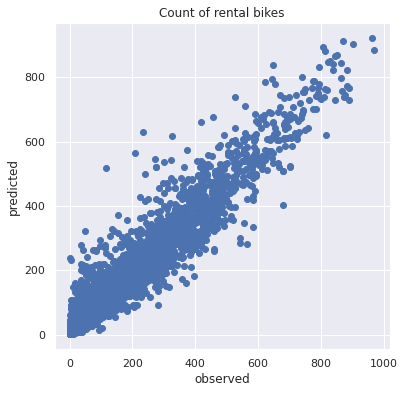

In [ ]:
R2_test_t, RMSE_test_t = model_perfomance(rfr2, X_test, Y_test, 'test')

We can see that this combination of parameters gives the best result on the test sample.


Now let's take a look at the importance of features. 

In [ ]:
feature_importances_rf = pd.DataFrame(rfr2.feature_importances_, index = X.columns,
                                      columns = ['Importance']).sort_values(by='Importance',
                                               ascending=False)
feature_importances_rf.head()

,Importance
temp,0.164981
hum,0.135860
hour_17,0.093844
workingday,0.091822
yr,0.076052


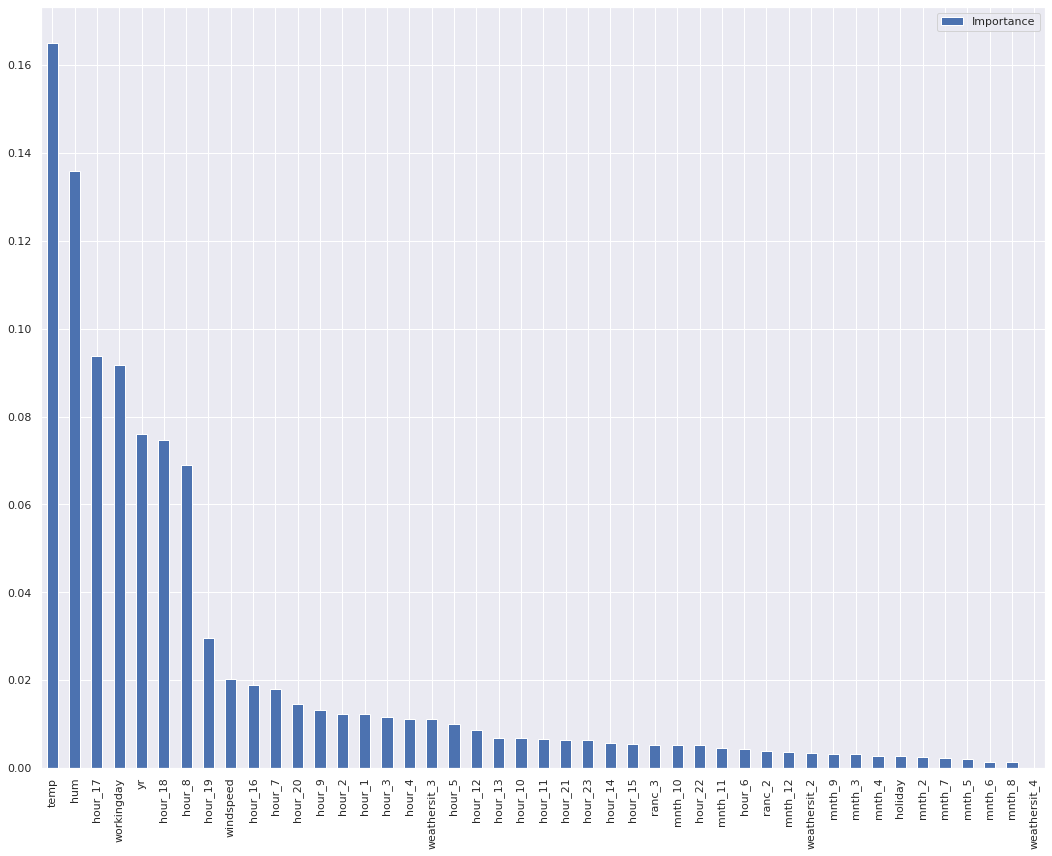

In [ ]:
feature_importances_rf.plot.bar();

We see that the most important are temperature and humidity, but these values are not large enough that we can only use them for prediction. 

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['Random Forest']))
perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248
ElasticNet,0.603,114.449,0.598,114.050,0.702,99.167,0.689,100.253
SVM,0.465,132.908,0.474,130.395,0.967,33.204,0.931,47.266
Random Forest,0.987,20.633,0.910,53.841,0.987,20.701,0.911,53.683


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['n_estimators = ' + str(95) + ', ' + 'max_features = ' + str(42)]}, 
                        index = ['Random Forest']))
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006
ElasticNet,0.702,99.167,0.689,100.253,"alpha = 0.01, l1_ratio = 0.99"
SVM,0.967,33.204,0.931,47.266,"C = 1000, kernel = rbf"
Random Forest,0.987,20.701,0.911,53.683,"n_estimators = 95, max_features = 42"


## 7) Gradient Boosting

XGBoost (Extreme Gradient Boosting), advanced implementation of gradient boosting algorithm, will be used. XGBoost has three types of parameters, it was decided to write out a description of the parameters for further convenience in model creating and tuning:

1. General Parameters: 
  - booster: it is decided to use tree-based models, so this parameter won't be tuned. 
  - silent: silent mode means that no running messages will be printed
  - nthread : parameter is used  for parallel processing;

2. Booster Parameters:
  - **eta** [deafult = 0.3]: analogous to learning rate in GBM;
  - **min_child_weight** [default = 6] : defines the minimum sum of weights of all observations required in a child. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
  - **max_depth** [default=6]: The maximum depth of a tree. Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. 
  - **max_leaf_nodes**: The maximum number of terminal nodes or leaves in a tree. If this is defined, GBM will ignore max_depth, since binary trees are created, a depth of $n$ would produce a maximum of $2^n$ leaves.
  - **gamma** [default=0]: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
  - **max_delta_step** [default=0]: this parameter is not usually used in trees based models, but it might help in logistic regression.
  - **subsample** [default=1]: Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree. Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Typical values: 0.5-1
  - **colsample_bytree** [default=1]: Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree. Typical values: 0.5-1

3. Learning Task Parameters




In [ ]:
import xgboost
from xgboost import XGBRegressor

- Without tuning

R2-score for train : 0.8065955105996799
RMSE for train : 79.93187372938972


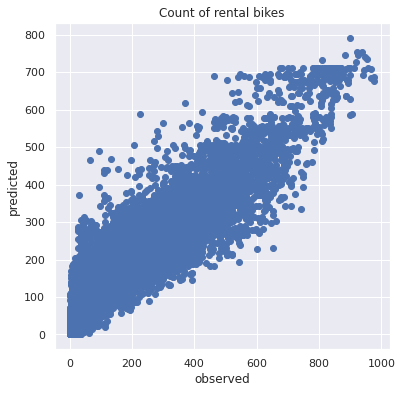

In [ ]:
xreg = XGBRegressor(subsample = 0.5,
                    colsample_bytree = 42/45, 
                    objective = 'reg:squarederror',
                    n_estimators = 100)  


xreg.fit(X_train, Y_train)  
R2_train, RMSE_train = model_perfomance(xreg, X_train, Y_train, 'train')

R2-score for test : 0.8041195047565612
RMSE for test : 79.57178259018694


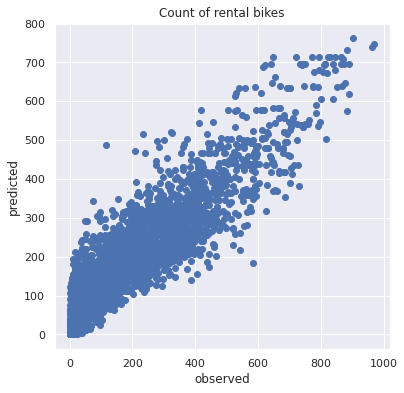

In [ ]:
R2_test, RMSE_test = model_perfomance(xreg, X_test, Y_test, 'test')

- Tuning. Three parameters were selected for tuning:

1. min_child_weight 

2. max_depth

3. gamma

In [ ]:
params_grid = {
 'max_depth' : np.arange(2, 10, 2),
 'min_child_weight' : np.arange(2, 10, 2),
 'gamma' : np.arange(0, 0.5, 0.1)
}

In [ ]:
xgb = XGBRegressor(subsample = 0.5,
                    colsample_bytree = 42/45, 
                    objective = 'reg:squarederror',
                    n_estimators = 100)

gsearch_xgb = GridSearchCV(estimator = xgb, 
    param_grid = params_grid, 
    scoring='r2',n_jobs = 4, cv=5)

gsearch_xgb.fit(X_train, np.ravel(Y_train))

GridSearchCV(cv=5,
             estimator=XGBRegressor(colsample_bytree=0.9333333333333333,
                                    objective='reg:squarederror',
                                    subsample=0.5),
             n_jobs=4,
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': array([2, 4, 6, 8]),
                         'min_child_weight': array([2, 4, 6, 8])},
             scoring='r2')

In [ ]:
print("Best params:", gsearch_xgb.best_params_)
print("Best cross validaton score", gsearch_xgb.best_score_)

Best params: {'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 4}
Best cross validaton score 0.9105699793515172


R2-score for train : 0.9467694045296203
RMSE for train : 41.93410520464002


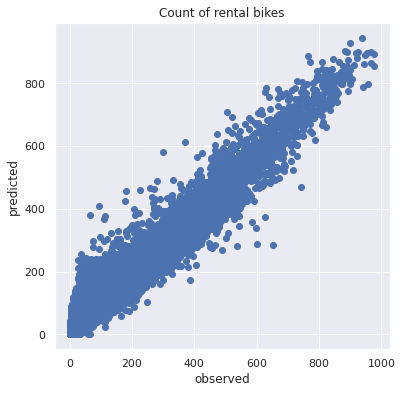

In [ ]:
#fitting with best parameters
xreg_tuned = XGBRegressor(subsample = 0.5,
                    colsample_bytree = 42/45, 
                    objective = 'reg:squarederror',
                    n_estimators = 100,
                    gamma = gsearch_xgb.best_params_['gamma'],
                    max_depth = gsearch_xgb.best_params_['max_depth'],
                    min_child_weight = gsearch_xgb.best_params_['min_child_weight'])  


xreg_tuned.fit(X_train, np.ravel(Y_train)) 
R2_train_t, RMSE_train_t = model_perfomance(xreg_tuned, X_train, Y_train, 'train')

R2-score for test : 0.9165096422201483
RMSE for test : 51.94953346872281


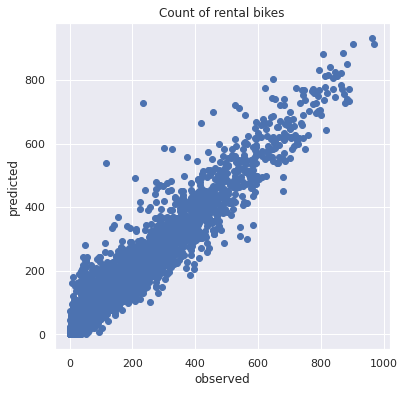

In [ ]:
R2_test_t, RMSE_test_t = model_perfomance(xreg_tuned, X_test, Y_test, 'test')

Taking a look on features importances. This is a metric that simply sums up how many times each feature is split on. 

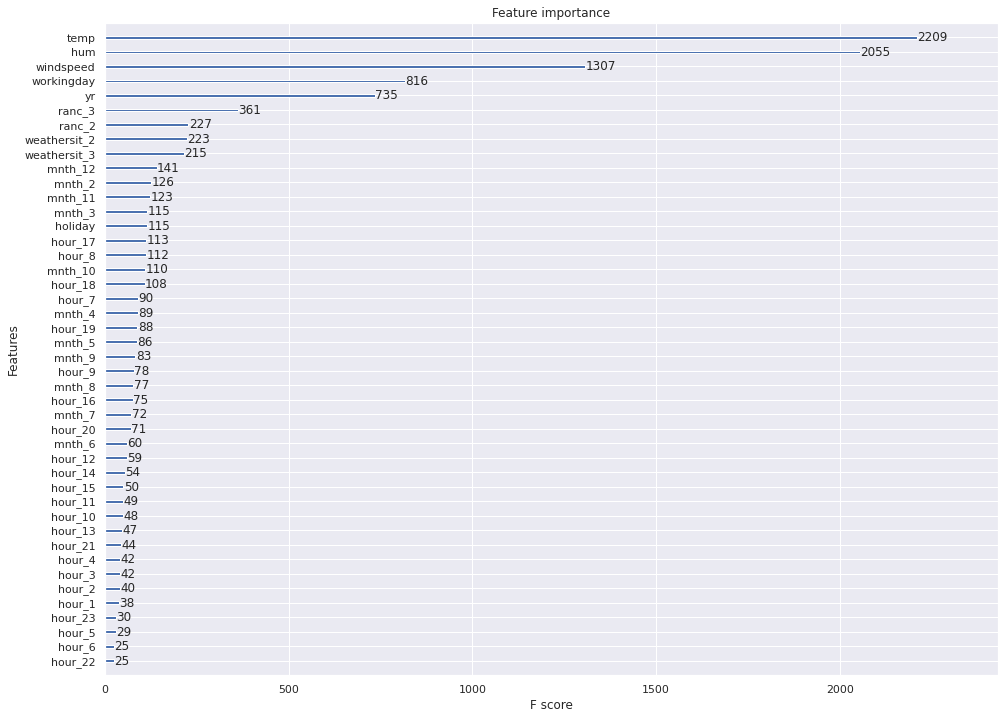

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 12))
xgboost.plot_importance(xreg_tuned, ax=axes);

Temperature and humidity are again the most important. But the further order of the feautures is different from RandomForest:

In [ ]:
feature_importances_rf.head(10)

,Importance
temp,0.164981
hum,0.135860
hour_17,0.093844
workingday,0.091822
yr,0.076052
hour_18,0.074773
hour_8,0.068975
hour_19,0.029578
windspeed,0.020248
hour_16,0.018977


In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['Gradient Boosting']))

In [ ]:
perfomance

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248
ElasticNet,0.603,114.449,0.598,114.050,0.702,99.167,0.689,100.253
SVM,0.465,132.908,0.474,130.395,0.967,33.204,0.931,47.266
Random Forest,0.987,20.633,0.910,53.841,0.987,20.701,0.911,53.683
Gradient Boosting,0.807,79.932,0.804,79.572,0.947,41.934,0.917,51.95


In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['max_depth = ' + str(gsearch_xgb.best_params_['max_depth']) + ', min_child_weight = ' + str(gsearch_xgb.best_params_['min_child_weight']) + ', gamma = ' + str(gsearch_xgb.best_params_['gamma'])]}, 
                        index = ['Gradient Boosting']))
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006
ElasticNet,0.702,99.167,0.689,100.253,"alpha = 0.01, l1_ratio = 0.99"
SVM,0.967,33.204,0.931,47.266,"C = 1000, kernel = rbf"
Random Forest,0.987,20.701,0.911,53.683,"n_estimators = 95, max_features = 42"
Gradient Boosting,0.947,41.934,0.917,51.950,"max_depth = 8, min_child_weight = 4, gamma = 0.4"


## 8) Neural Network

We will use Kerras models.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import multiprocessing
from tensorflow.keras.optimizers import Adam

- Without tuning

In [ ]:
def create_model(learning_rate = 0.1):
    model = Sequential()
    model.add(Input(shape=(num_features, ), dtype='float32'))
    model.add(Dense(500, input_dim=num_features, activation ='relu'))
    model.add(Dense(1, kernel_initializer = 'normal', activation='linear'))
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])
    return model

In [ ]:
# create model
neural_network = KerasRegressor(build_fn = create_model, batch_size = 300, verbose = 0)
neural_network.fit(X_train, np.ravel(Y_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


R2-score for train : 0.8764576710552704
RMSE for train : 63.88436910529963


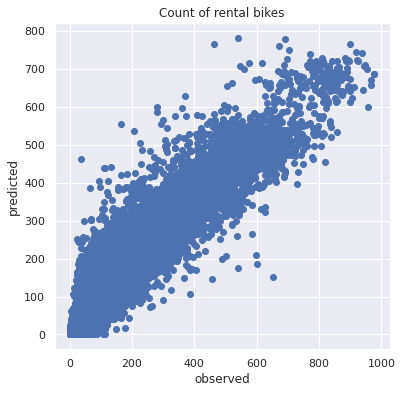

In [ ]:
R2_train, RMSE_train = model_perfomance(neural_network, X_train, Y_train, 'train')

R2-score for test : 0.8778613794144408
RMSE for test : 62.83331832578707


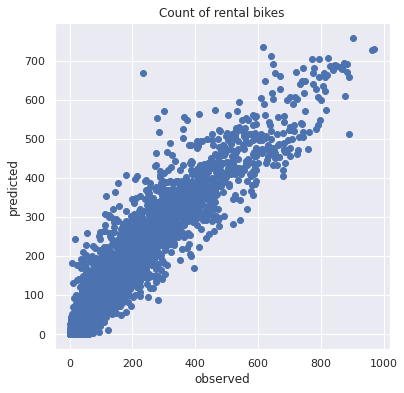

In [ ]:
R2_test, RMSE_test = model_perfomance(neural_network, X_test, Y_test, 'test')

- Tuning parameters:
  1. Learning rate
  2. Number of epochs

In [ ]:
params_grid = {
    "epochs": np.arange(40, 120, 40),
    "learning_rate": np.arange(0.05, 0.5, 0.05)
}

In [ ]:
neural_network = KerasRegressor(build_fn = create_model, batch_size = 300, verbose = 0)

grid = GridSearchCV(estimator = neural_network, 
    param_grid = params_grid,
    scoring = 'neg_mean_squared_error',
    cv = 5, 
    refit=True,
    verbose = True
)

grid.fit(X_train, np.ravel(Y_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5f83d64590>,
             param_grid={'epochs': array([40, 80]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])},
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'epochs': 80, 'learning_rate': 0.05}
Best cross validaton score -2272.579214136912


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


R2-score for train : 0.9713076408216411
RMSE for train : 30.78717551547981


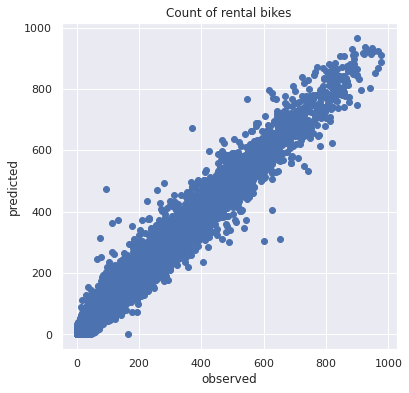

In [ ]:
#fitting with best parameters

nn = KerasRegressor(build_fn = create_model, batch_size = 300, verbose = 0, epochs = grid.best_params_['epochs'], learning_rate = grid.best_params_['learning_rate'])
nn.fit(X_train, np.ravel(Y_train))
R2_train_t, RMSE_train_t = model_perfomance(nn, X_train, Y_train, 'train')

R2-score for test : 0.941379979103614
RMSE for test : 43.52978029064584


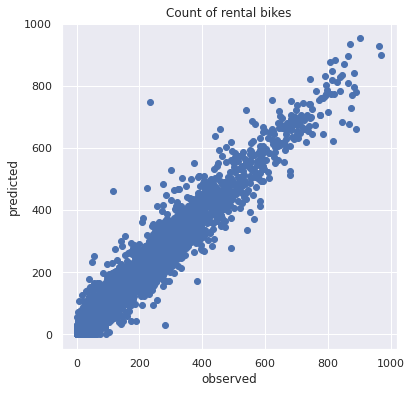

In [ ]:
R2_test_t, RMSE_test_t = model_perfomance(nn, X_test, Y_test, 'test')

In [ ]:
perfomance = perfomance.append(pd.DataFrame({'R2_train' : [round(R2_train, 3)],
                       'RMSE_train' : [round(RMSE_train, 3)],
                        'R2_test' : [round(R2_test, 3)],
                       'RMSE_test' : [round(RMSE_test, 3)],
                       'R2_train (after tuning)' : [round(R2_train_t, 3)],
                       'RMSE_train (after tuning)' : [round(RMSE_train_t, 3)],
                       'R2_test (after tuning)' : [round(R2_test_t, 3)],
                       'RMSE_test (after tuning)' : [round(RMSE_test_t, 3)]}, index = ['Neural Network']))

In [ ]:
best_results = best_results.append(pd.DataFrame({'R2_train' : [round(R2_train_t, 3)],
                       'RMSE_train' : [round(RMSE_train_t, 3)],
                        'R2_test' : [round(R2_test_t, 3)],
                       'RMSE_test' : [round(RMSE_test_t, 3)],
                        'Best parameters' : ['epochs = ' + str(grid.best_params_['epochs']) + ', learning_rate = ' + str(grid.best_params_['learning_rate'])]}, 
                        index = ['Neural Network']))

# Results

Let's take a look at the final metrics table showing the $R^2$ and $RMSE$ values both before and after tuning the parameters. 

In [ ]:
perfomance 

,R2_train,RMSE_train,R2_test,RMSE_test,R2_train (after tuning),RMSE_train (after tuning),R2_test (after tuning),RMSE_test (after tuning)
Linear regression,0.702,99.153,0.689,100.245,,,,
Ridge regression,0.702,99.155,0.689,100.243,0.702,99.155,0.689,100.244
Lasso,0.693,100.702,0.681,101.578,0.702,99.162,0.689,100.248
ElasticNet,0.603,114.449,0.598,114.050,0.702,99.167,0.689,100.253
SVM,0.465,132.908,0.474,130.395,0.967,33.204,0.931,47.266
Random Forest,0.987,20.633,0.910,53.841,0.987,20.701,0.911,53.683
Gradient Boosting,0.807,79.932,0.804,79.572,0.947,41.934,0.917,51.95
Neural Network,0.876,63.884,0.878,62.833,0.971,30.787,0.941,43.53


...and a table with metrics for tuned models with the best parameters found using grid search 

In [ ]:
best_results

,R2_train,RMSE_train,R2_test,RMSE_test,Best parameters
Linear regression,0.702,99.153,0.689,100.245,-
Ridge regression,0.702,99.155,0.689,100.243,alpha_I = 1.024
Lasso,0.702,99.162,0.689,100.248,alpha_II = 0.006
ElasticNet,0.702,99.167,0.689,100.253,"alpha = 0.01, l1_ratio = 0.99"
SVM,0.967,33.204,0.931,47.266,"C = 1000, kernel = rbf"
Random Forest,0.987,20.701,0.911,53.683,"n_estimators = 95, max_features = 42"
Gradient Boosting,0.947,41.934,0.917,51.950,"max_depth = 8, min_child_weight = 4, gamma = 0.4"
Neural Network,0.971,30.787,0.941,43.530,"epochs = 80, learning_rate = 0.05"


Three (or even four) good models were obtained by the result of work.

### Findings

1) Neural network model perfomed better than others algorithm's models. It has the highest coefficient of determination $R^2$ on the test sample and the least root mean square error $RMSE$. The best tuning parameters are: $learning$_$rate = 0.05$ and $epochs = 80$. The NN's scores on train sample are better than on the test, but not significantly, and it's normal that model perfomance on learning data is better.

2) SVR model also perfomed very well and showed the second result in metrics on the test sample. The best parameters are: cost value $C = 1000$ and $kernel = rbf$

Gradient Boosting model takes 3rd place with hyperparameters: $max$_$depth = 8$, $min$_$child$_$weight = 4$ and $gamma = 0.4$

3) Though Random Forest model has the best metrics on the train data ($R^2 = 0.987$!), but it only takes 4th place on the test data. It can be assumed that in this case there was a slight model overfitting. However, the model still shows a high result on test data, so I cannot be sure that overfitting takes place. 

4) Temperature and humidity are the most important features according to the results of both Gradient Boosting and Random Forest models.

5) Linear models (Linear regression, Lasso, Ridge and Elastic Net) have the lowest $R^2-score$ (it is worse by more than 0.2 than the models listed in the previous paragraphs) and the metric RMSE for them is about 2 times more. Perhaps this is due to the fact that the models are too simple to describe the patterns in the data. In addition, there are a lot of categorical features in the data, while real features are practically absent. All of these models give almost the same result and no significant improvements can be found. Various types of regularization are designed to help in the fight against overfitting and multicollinearity, in our case, it was rather underfitting. Pairwise correlated features were  found at the preprocessing stage and one feature in pair had been dropped before models tuning.

### Comments

+1 bounus for the detail of work

I think it is already well written for the findings and documentation, I think in the data science, one of the important
part is the documentation to deliver the information concisely, but many people underrated this value. Nice work!

I would put small comments only.

1) First, you can think about mean_absolute_percentage_error [MAPE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html) for the matrix in regression. 
MAPE describes error as percentage, so it is much more intuitive. Of course, there is the downside of this matrix. If you have a lot of zero values, this matrix can misguide you since you can't divide with zero in data. you may check the detail in the link above.

2) Second, I suggest prepare validation dataset to check overfitting, during the training. The most of frame work such like tensorflow or pytorch provides you room for the validation during the traning to check overfitting. Well, the basic idea is same, there is some approach to detect overfitting, such as cross-validation so on. You can check follow link for the detail.
https://statisticsbyjim.com/regression/overfitting-regression-models/
